In [1]:
%load_ext autoreload
%autoreload 2

import litelearn as ll
import seaborn as sns

# regression

the following cols contain null values and will be filled naively:
numerical columns:
[]
categorical columns:
['sex']
sex - mode: Male
casting species onto category
casting island onto category
casting sex onto category
None
using categories: ['species', 'island', 'sex']


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.040673
0:	learn: 756.3330713	test: 820.7875873	best: 820.7875873 (0)	total: 21.5ms	remaining: 21.5s
1:	learn: 733.6599572	test: 796.3602673	best: 796.3602673 (1)	total: 59.3ms	remaining: 29.6s
2:	learn: 710.9723484	test: 772.7878270	best: 772.7878270 (2)	total: 83.6ms	remaining: 27.8s
3:	learn: 690.5738732	test: 751.2940205	best: 751.2940205 (3)	total: 125ms	remaining: 31.1s
4:	learn: 672.3878189	test: 730.8790602	best: 730.8790602 (4)	total: 170ms	remaining: 33.8s
5:	learn: 653.1866786	test: 710.4305684	best: 710.4305684 (5)	total: 195ms	remaining: 32.3s
6:	learn: 635.6536741	test: 692.1047130	best: 692.1047130 (6)	total: 236ms	remaining: 33.5s
7:	learn: 618.6423460	test: 673.3118453	best: 673.3118453 (7)	total: 274ms	remaining: 34s
8:	learn: 604.6471430	test: 658.0213983	best: 658.0213983 (8)	total: 299ms	remaining: 32.9s
9:	learn: 589.1974957	test: 641.5807014	best: 641.5807014 (9)	total: 337ms	remaining: 33.4s
10:	learn: 574.2437336	test: 625.2794367	best: 62

,rmse,support
train,245.998219,239
test,306.274648,103


,Feature Id,Importances
0,sex,42.838400
1,species,30.339900
2,flipper_length_mm,11.435730
3,bill_depth_mm,6.595040
4,bill_length_mm,5.231046
5,sex_is_missing,2.502917
6,island,1.056966


,rmse,support
train,245.998219,239
test,306.274648,103


,Feature Id,Importances
0,sex,42.838400
1,species,30.339900
2,flipper_length_mm,11.435730
3,bill_depth_mm,6.595040
4,bill_length_mm,5.231046
5,sex_is_missing,2.502917
6,island,1.056966


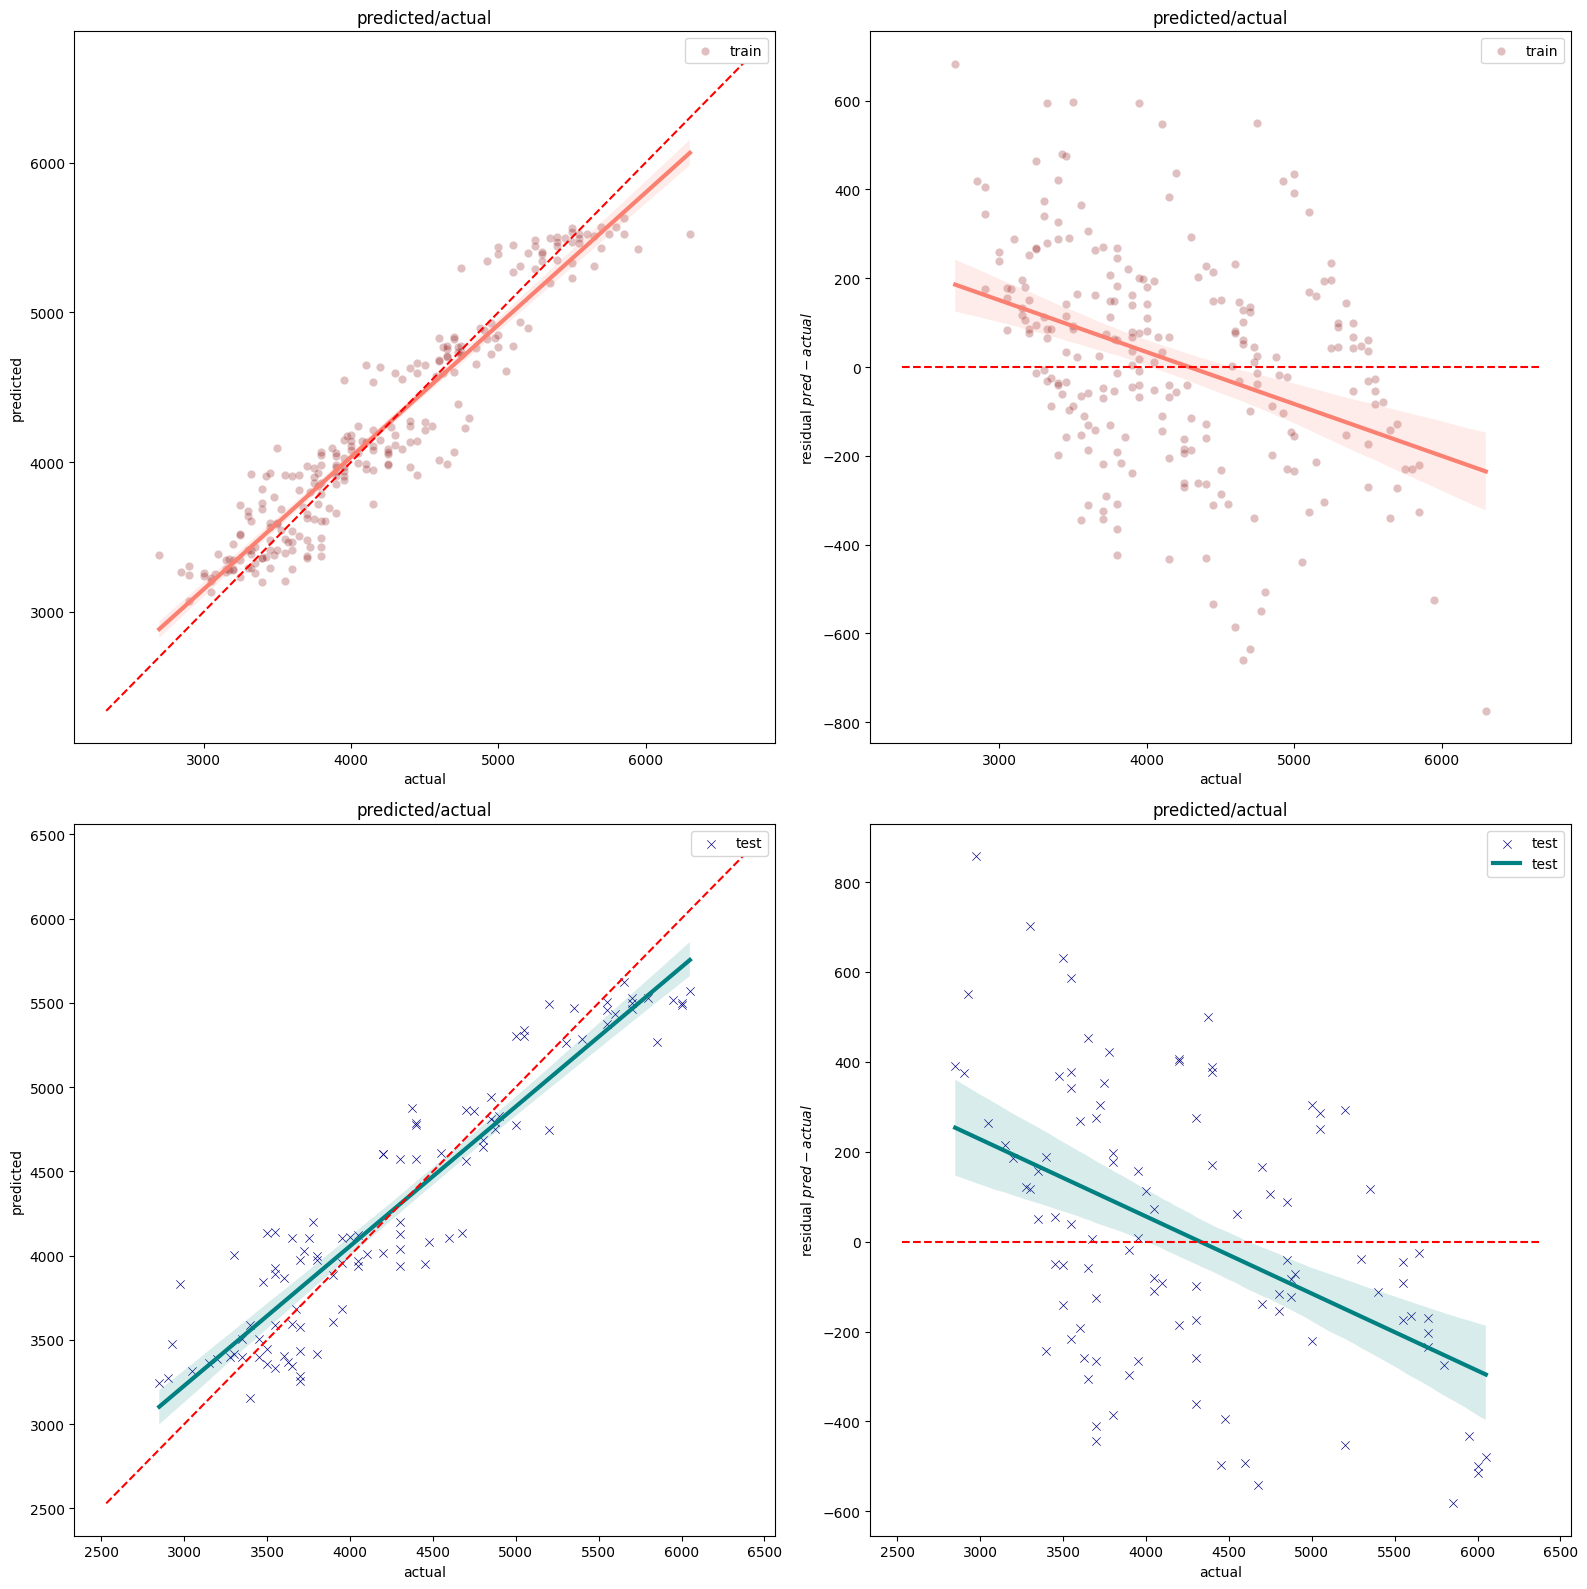

In [41]:
dataset = "penguins"
target = "body_mass_g"

df = sns.load_dataset(dataset)
df = df.dropna(subset=[target])
model = ll.core_regress_df(df, target)
result = model.get_evaluation()
model.display_evaluations()

In [42]:
model.display_feature_importance()

,Feature Id,Importances
0,sex,42.838400
1,species,30.339900
2,flipper_length_mm,11.435730
3,bill_depth_mm,6.595040
4,bill_length_mm,5.231046
5,sex_is_missing,2.502917
6,island,1.056966


,Feature Id,Importances
0,sex,42.838400
1,species,30.339900
2,flipper_length_mm,11.435730
3,bill_depth_mm,6.595040
4,bill_length_mm,5.231046
5,sex_is_missing,2.502917
6,island,1.056966


In [43]:
model.display_permutation_importance()

,mean,std
species,0.416862,0.034262
flipper_length_mm,0.247662,0.028399
sex,0.161259,0.039363
bill_depth_mm,0.022777,0.005426
bill_length_mm,0.022730,0.004995
island,0.010137,0.003031
sex_is_missing,0.009548,0.005065


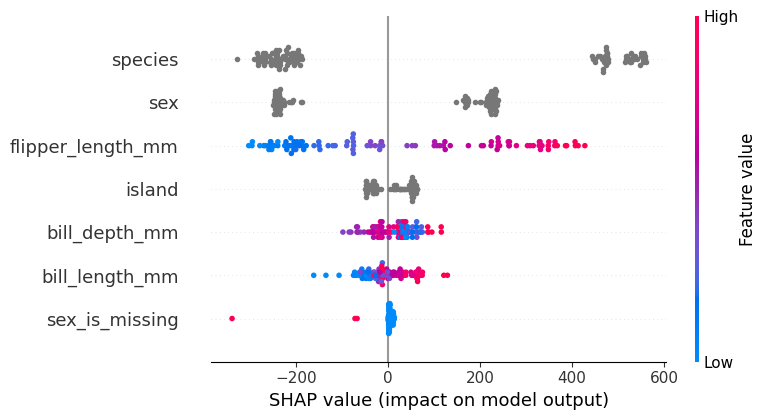

In [44]:
model.display_shap()

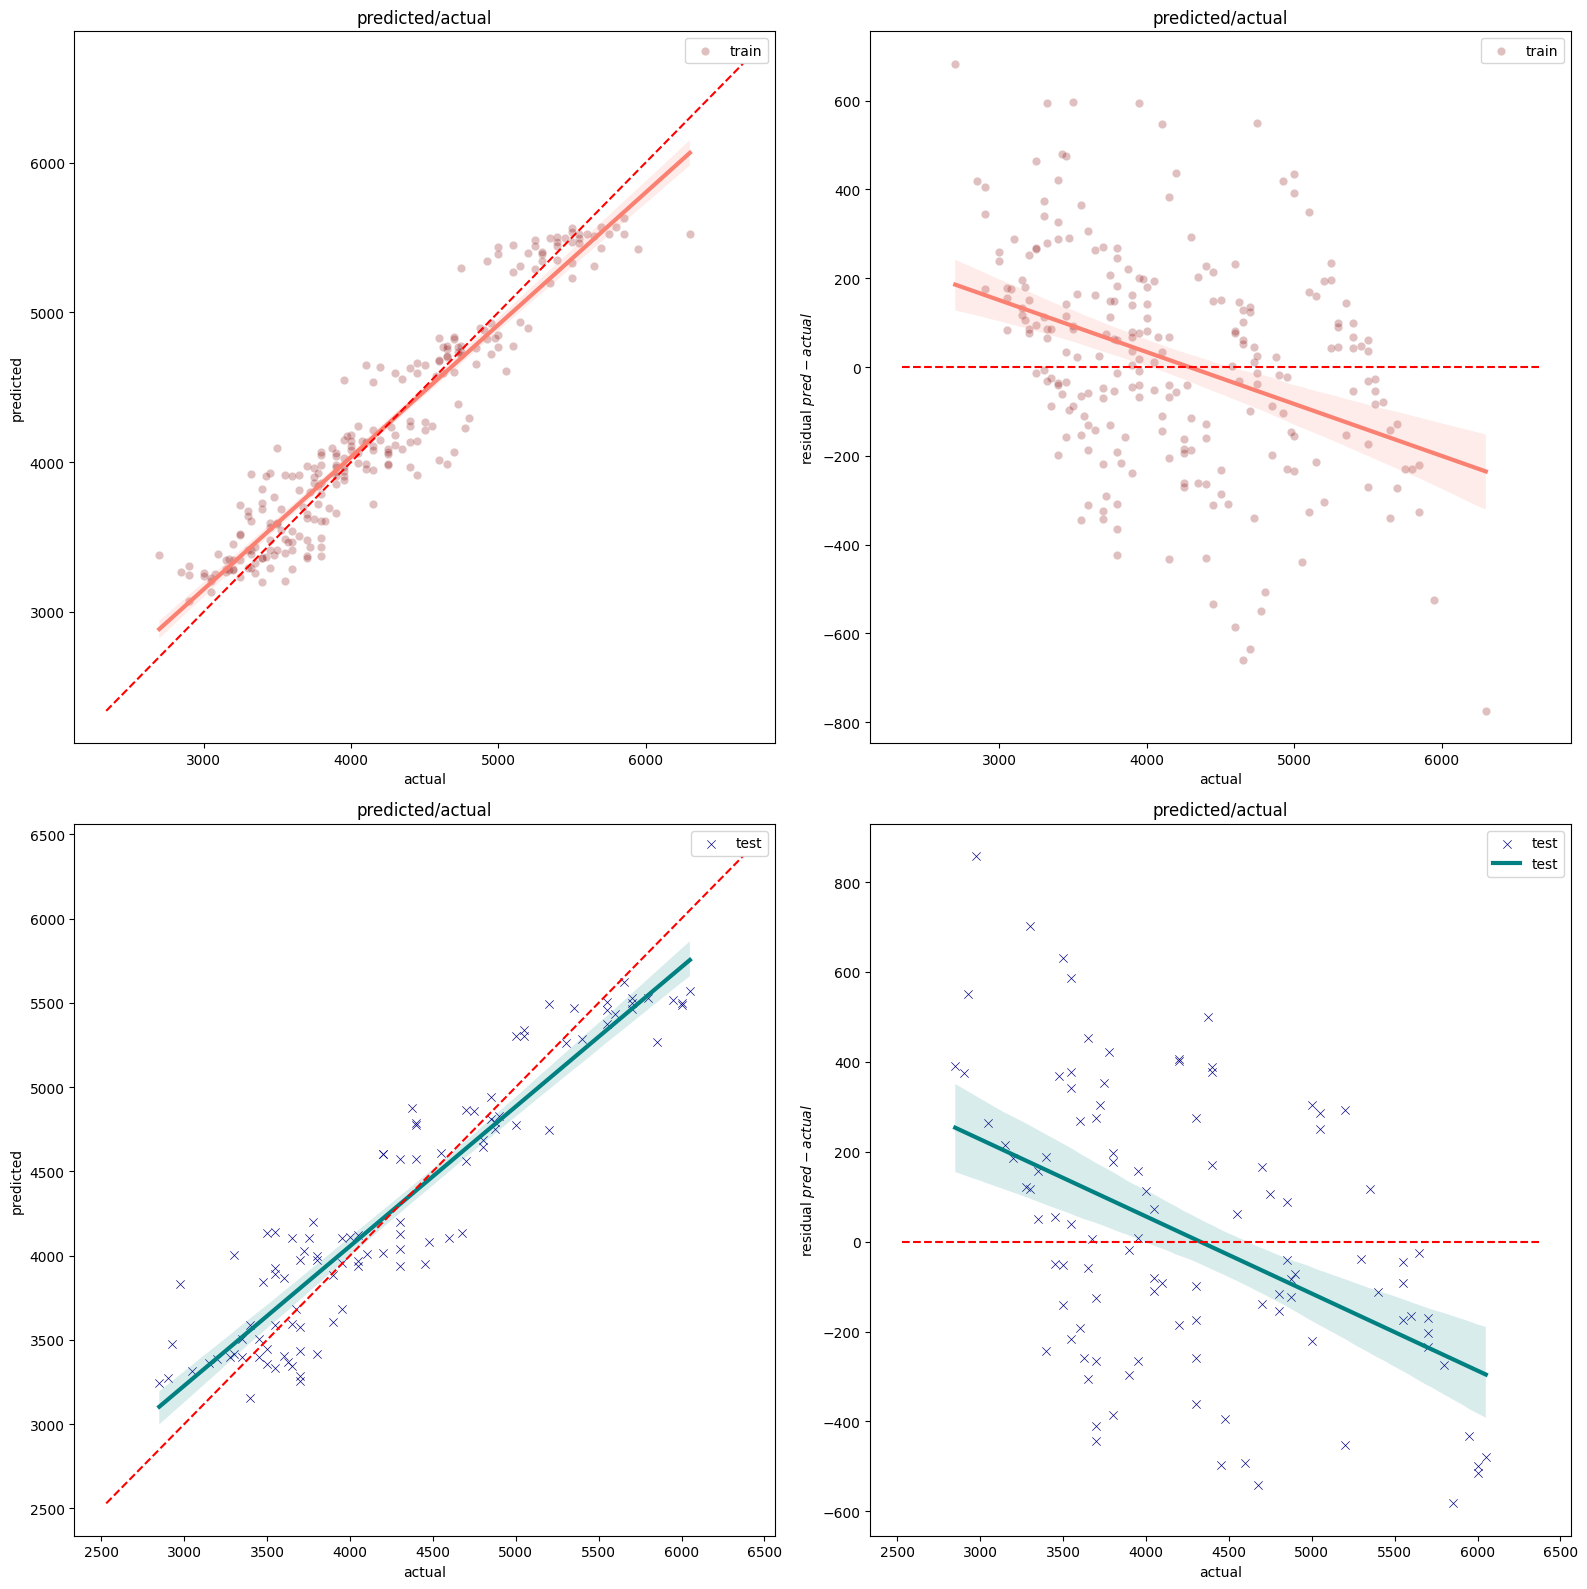

In [45]:
model.display_residuals()

In [46]:
reduced = model.progressive_permutation_feature_selection()

std= 1
threshold= 0
k= 5
std= 0
threshold= 0
k= 5
std= -0.5
threshold= 0
k= 3
current performance:
             rmse  support
train  245.998219      239
test   306.274648      103

after dropping:
             rmse  support
train  245.998219      239
test   306.274648      103

error reduction (higher is better):
       rmse  support
train   0.0        0
test    0.0        0



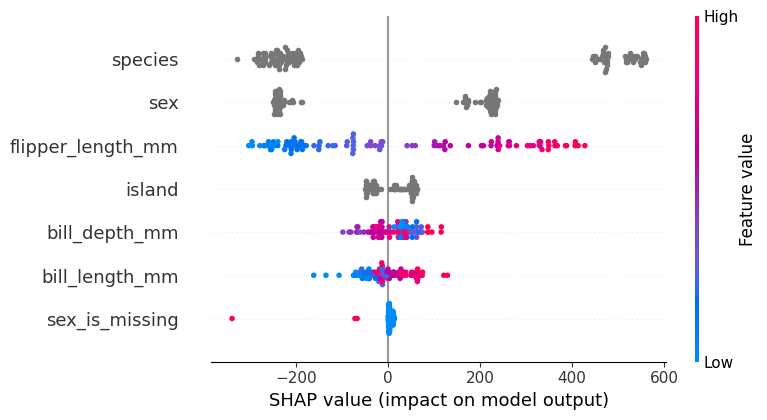

In [47]:
reduced[-1].display_shap()

In [15]:
model.train_frame.X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 336 to 297
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            103 non-null    category
 1   island             103 non-null    category
 2   bill_length_mm     103 non-null    float64 
 3   bill_depth_mm      103 non-null    float64 
 4   flipper_length_mm  103 non-null    float64 
 5   sex                103 non-null    int8    
 6   sex_is_missing     103 non-null    bool    
dtypes: bool(1), category(2), float64(3), int8(1)
memory usage: 7.9 KB
